# Random Noise

* [Signal Classification](#SignalClassification)
* [Characterization of Amplitude Distribution](#AmplitudeDistribution)
* [Characterization of Power Spectral Density (Temporal Behavior)](#PowerSpectralDensity)

## Signal Classification <a class="anchor" id="SignalClassification"></a>

Signals can generally be categorized into energy and power signals. For energy signals $x(t)$, 

\begin{equation}
    \int_{- \infty}^{\infty} |x(t)|^2 dt < \infty 
\end{equation}

holds, for power signals 

\begin{equation}
    \lim_{T \to \infty} \frac{1}{2T} \int_{-T}^T |x(t)|^2 dt < \infty 
\end{equation}

is true. Power signals have a finite power, while energy signals have a finite energy but infinite power. All periodic signals, for instance sine and cosine, cannot be energy signals, but they are power signals due to their finite power. The same argument is true for stationary stochastic signals.

Furthermore, we distinguish analog and digital signals and mixtures of them.

* An analog signal is continuous in time and amplitude.
* A sampled analog signal is discrete in time, but still continuous in amplitude.
* Quantizing the amplitudes of analog signals yields a continuous-time signals with discrete amplitudes.
* A digital signal is discrete in time and amplitude.

In communications, stochastic signals like random disturbances are often termed noise. In contrast to deterministic signals, they cannnot be described by analytic functions but by their statistical properties and parameters. 

* probability density functions for continuous, probabilities for discrete amplitudes
* moments like mean, variance 
* Autocorrelation functions and power spectrum density

In the following description, we assume stationary random processes, whose statistical properties do not change over time. We consider the special case of additive, white Gaussian Noise (AWGN) $n(t)$ disturbing the information signal $x(t)$. The received signal has the form

\begin{equation}
    y(t) = x(t) + n(t) \; .
\end{equation}

An important parameter is the signal-to-noise ratio $\gamma$. For zero-mean signals $x(t)$ and $n(t)$ it becomes

\begin{equation}
    \gamma = \frac{\sigma_{\cal X}^2}{\sigma_{\cal N}^2}
\end{equation}

and is usually given in a logarithmic scale $10 \log_{10}(\gamma)$ in dB.

Next, we dissuss the Gaussian amplitude distribution of $n(t)$. Afterwards, the noise color, i.e. its power spectral density is addressed. Both are independent properties.

## Characterization of Amplitude Distribution <a class="anchor" id="AmplitudeDistribution"></a>

In communications, noise usually constitutes of many different independent sources. Due to their statistical independence, their superposition results asymptotically in a Gaussian distribution due to the central limit theorem. For statistically independent noise components $n_i(t)$ with means $\mu_{{\cal N},i}$ and variances $\sigma_{{\cal N},i}^2$, the sum

\begin{equation}
     n(t) = \sum_{i=1}^L n_i(t)
\end{equation}

becomes Gaussian distributed for $L \to \infty$. Mean and variance of this Gaussian distribution are

\begin{align}
    \mu_{\cal N} &= \sum_{i=1}^L \mu_{{\cal N},i} \\
    \sigma_{\cal N}^2 &= \sum_{i=1}^L \sigma_{{\cal N},i}^2  \; .
\end{align}


For real-valued noise, the Gaussian distribution has the form 

\begin{equation}
    p_{\cal N}(\xi) = \frac{1}{\sqrt{2 \pi \sigma_{\cal N}^2}} 
                      \cdot e^{- \frac{(\xi-\mu_{\cal N})^2}{2 \sigma_{\cal N}^2}} \; .
\end{equation}

Für complex-valued noise $n(t)=n'(t)+jn''(t)$, it is usually assumed that real and imaginary parts are statistically independent of each other and the overall noise power $\sigma_{\cal N}^2$ is equally distributede among real and imaginary part, i.e. $\sigma_{{\cal N}'}^2=\sigma_{{\cal N}''}^2=\frac{\sigma_{\cal N}^2}{2}$ holds. Consequently, the complex Gaussian distribution becomes

\begin{align}
    p_{\cal N}(\xi) 
    &= p_{{\cal N}'}(\xi') \cdot p_{{\cal N}''}(\xi'') \\
    &= \frac{1}{\sqrt{2 \pi \sigma_{{\cal N}'}^2}} 
       \cdot e^{- \frac{(\xi'-\mu_{{\cal N}'})^2}{2 \sigma_{{\cal N}'}^2}} 
       \cdot \frac{1}{\sqrt{2 \pi \sigma_{{\cal N}''}^2}} 
       \cdot e^{- \frac{(\xi''-\mu_{{\cal N}''})^2}{2 \sigma_{{\cal N}''}^2}}  \\
    &= \frac{1}{\pi \sigma_{\cal N}^2} 
       \cdot e^{- \frac{(\xi'-\mu_{{\cal N}'})^2 + (\xi''-\mu_{{\cal N}''})^2}
                       {\sigma_{\cal N}^2}}  \\
    &= \frac{1}{\pi \sigma_{\cal N}^2} 
       \cdot e^{- \frac{|\xi-\mu_{\cal N}|^2}{\sigma_{\cal N}^2}} \; .
\end{align}

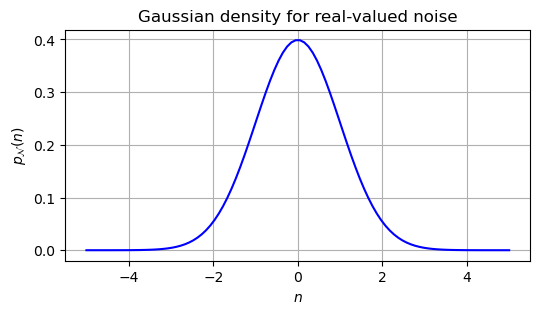

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# real gaussian distribution
# number of samples
N = 100
# variance
sigma2_N = 1.0
# mean
mu_N_real = 0.0
# amplitude range
n_real = 5.0 * np.sqrt(sigma2_N) * np.linspace(-1,1,N) + mu_N_real
pdf_N_real = np.exp(-(n_real-mu_N_real)**2/2/sigma2_N) / np.sqrt(2*np.pi*sigma2_N)

fig_real = plt.figure(figsize=(6,3))

ax1 = fig_real.add_subplot(111)
ax1.plot(n_real, pdf_N_real, 'b-')
plt.xlabel('$n$')
plt.ylabel('$p_{\\cal N}(n)$')
plt.title('Gaussian density for real-valued noise')
plt.grid(True)

plt.show()

The above figure shows a real valued Gaussian density with meabn $\mu_{\cal N}=0$ and variance $\sigma_{\cal N}^2=1$. The figure below illustrates the probability density function for complex-valued Gaussian noise with mean $\mu_{\cal N} = 1+j0.5$ and variance $\sigma_{\cal N}^2=1$. We observe that the variance is equally shared between real and imaginary parts. For both, it amounts to $\sigma_{{\cal N}'}^2=\sigma_{{\cal N}''}^2=0.5$. The associated marginal Gaussian densities, which are obtained by integrating versus real or imaginary parts, are plotted as well.

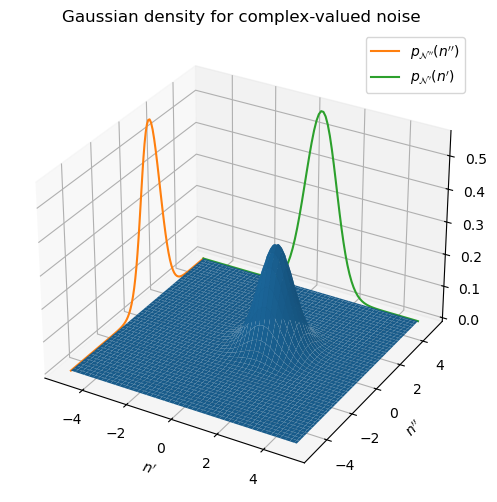

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# complex gaussian distribution
# mean
mu_N_cmplx = 1.0 + 1j*0.5
# amplitude range
dn = n_real[1] - n_real[0]
n_re, n_im = np.meshgrid(n_real,n_real)
n_cmplx = n_re + 1j*n_im
pdf_N_cmplx = np.exp(-np.abs(n_cmplx-mu_N_cmplx)**2/sigma2_N) / (np.pi*sigma2_N)
# marginal densities
pdf_Ni_cmplx = np.sum(pdf_N_cmplx,axis=0) * dn   # imaginary part
pdf_Nr_cmplx = np.sum(pdf_N_cmplx,axis=1) * dn   # real part

fig_cmplx = plt.figure(figsize=(6,6))
ax2 = fig_cmplx.add_subplot(111, projection='3d')
ax2.plot_surface(np.real(n_cmplx),np.imag(n_cmplx), pdf_N_cmplx)
ax2.plot(-np.ones(len(n_real))*5,n_real, pdf_Ni_cmplx,label='$p_{{\\cal N}^{\\prime \\prime}}(n^{\\prime \\prime})$')
ax2.plot(n_real,np.ones(len(n_real))*5, pdf_Nr_cmplx,label='$p_{{\\cal N}^{\\prime}}(n^{\\prime})$')
plt.xlabel('$n^{\\prime}$')
plt.ylabel('$n^{\\prime \\prime}$')
plt.title('Gaussian density for complex-valued noise')
plt.grid(True)
plt.legend()
plt.show()

## Characterization of Power Spectral Density (Temporal Behavior) <a class="anchor" id="PowerSpectralDensity"></a>

The color of the noise determines its temporal behavior. White noise contains similar to white light all spectral components in the relevant frequency range with the same intensity. Colored noise shows different intensities in the considered frequency range, i.e. its power varies over frequency. The average power density with respect to the frequency axis is called power spectrum density $S_{\cal NN}(j \omega)$ and has the dimension [Watt/Hz]. The total power can be computed by integrating the power spectral density. Assuming a limited frequency range $[-B/2,+B/2]$,

\begin{align}
    N = \frac{1}{2 \pi} \cdot \int_{-\pi B}^{\pi B} S_{\cal NN}(j \omega) \ d\omega
\end{align}

holds. For white noise, the power spectral density is a constant and is usually defined by $N_0/2$ in the transmission band (around carrier frequency $f_0$) of a communication system. In the equivalent base band, it becomes $N_0$, whereby it is equally distributed onto real and imaginary parts. As the bandwidth is doubled when applying a simple two-sided amplitude modulation, we obtain identical noise powers in the transmission band and the equivalent baseband. 

\begin{align}
    N &= \frac{1}{2 \pi} \cdot \int_{-\pi B}^{\pi B} N_0 \ d\omega 
       = \frac{1}{2 \pi} \cdot \int_{-\omega_0 - \pi B}^{-\omega_0 + \pi B} \frac{N_0}{2}
       \ d\omega 
       + \frac{1}{2 \pi} \cdot \int_{\omega_0 - \pi B}^{\omega_0+\pi B} \frac{N_0}{2} \ d\omega 
      = B N_0
\end{align}

The temporal behavior of signals given their power spectral density is described by the famous theorem from Wiener and Khintchine. It states that the power spectral density is the Fourier transform of the autocorrelation function.

\begin{equation}
    S_{\cal NN}(j \omega) = \int_{- \infty}^{\infty} r_{\cal NN}(\tau) \ d\tau
\end{equation}

The autocorrelation function $r_{\cal NN}(\tau) = \mathrm{E}\{ n^*(t) n(t-\tau) \}$ becomes a Dirac impulse for constant power spectral densities meaning that the attribute "white" corresponds to uncorrelated signals in time. By linear filtering, white signals can be colored. 

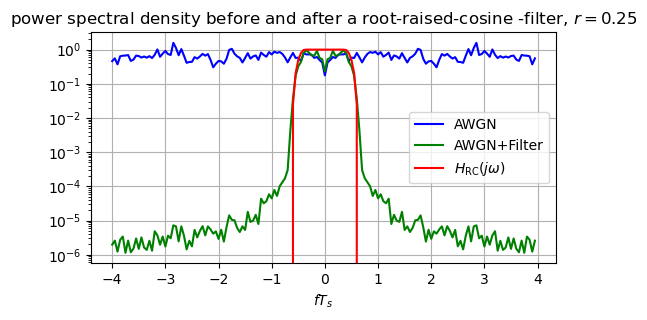

In [14]:
import sys

ECCpath = '../ECCpython'
if (not ECCpath==None) and (not ECCpath in sys.path):
    sys.path.append(ECCpath)

from Modulation.modulation import Modulation
mod = Modulation(1, coding_type='gray',modulation_type='PSK')

#from modulation import rcosfilter, rrcosfilter
from scipy import signal

N = 1000
# averaging for power density spectrum
Npsd = 50

# roll-off factor of Root-Raised-Cosine filter
r = 0.25
# symbol duration in seconds
Ts = 1e-6
# oversampling factor
w = 8
# sampling rate in Hz
fa = w / Ts
# length of filter impulse response in symbols
N_rc_sym = 8
# length of filter impulse response in samples
N_rc = N_rc_sym*w

time,g_rrc = mod.rrcosfilter(N_rc, r, Ts, fa)
time = time / Ts

awgn = np.random.normal(0,sigma2_N,N)

# filter
awgn_rrc = np.convolve(awgn,g_rrc)

# estimation of power spectral density with Welch method
f, psd_awgn = signal.welch(awgn, fs=fa, nperseg=N*w/Npsd, return_onesided=False, scaling='spectrum')
f, psd_awgn_rrc = signal.welch(awgn_rrc, fs=fa, nperseg=N*w/Npsd, return_onesided=False, scaling='spectrum',axis=0)
f = np.fft.fftshift(f)
psd_awgn = np.fft.fftshift(psd_awgn) * N_rc
psd_awgn_rrc = np.fft.fftshift(psd_awgn_rrc)

# analytical solution of power spectral density equals squared magnitude of transfer function of root-raised-cosine transmit filter
# squared magnitude of root-raised-cosine characteristic equals raised-cosine characteristic
# solution normalized to maximum value of 1 (divided by T_s sigma_D^2)
G_RC = 0.5 * (1 + np.cos(np.pi/(2*r)*(np.abs(f)*2*Ts-(1-r))))
ptr = np.argwhere(np.abs(f)*2*Ts<1-r)
G_RC[ptr.flatten()] = 1.0
ptr = np.argwhere(np.abs(f)*2*Ts>1+r)
G_RC[ptr.flatten()] = 0.0

fig = plt.figure(figsize=(6,3))
ax3 = fig.add_subplot(111)
ax3.semilogy(f*Ts, psd_awgn, 'b-', label='AWGN')
ax3.semilogy(f*Ts, psd_awgn_rrc, 'g-', label='AWGN+Filter')
ax3.semilogy(f*Ts, G_RC,'r-',label='$H_{\\mathrm{RC}}(j \\omega)$')
plt.xlabel('$f T_s$')
plt.title('power spectral density before and after a root-raised-cosine -filter, $r=0.25$')
plt.grid(True)
plt.legend()

plt.show()

The figure above illustrates that the originally white noise (blue) is colored by the linear filter. Please note that the noise has been filtered by a root-raised-cosine filter, its power spectral density follows the squared magnitude of the filter transfer function. Therefore, it has a shape of raised-cosine filter (red), not a root-raised cosine filter. 